# Analisis de tiempos de perforación

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import dateparser 
import glob

In [2]:
bd=pd.read_csv("/Users/fffte/ainda_drive/python/csv/benchmark/mexico/mx_tiempos.csv",
              index_col=0,parse_dates=True)

In [3]:
bd.fecha_inicio_perforacion=bd.fecha_inicio_perforacion.astype("datetime64[ns]")
bd.fecha_fin_perforacion=bd.fecha_fin_perforacion.astype("datetime64[ns]")

In [4]:
bd["dias_perforacion"]=(bd.fecha_fin_perforacion-bd.fecha_inicio_perforacion).dt.days

In [5]:
display(bd.head())

,gid,pozo,campo,entidad,ubicacion,objetivo_inicial,ultimo_estado_reportado,tipo_de_hidrocarburo,fecha_inicio_perforacion,fecha_fin_perforacion,profundidad_total,profundidad_vertical,trayectoria,disponible,tiempo_perforacion,dias_perforacion
0,245443,LOS SOLDADOS-488,LOS SOLDADOS,VERACRUZ DE IGNACIO DE LA LLAVE,TERRESTRE,DESARROLLO,INACTIVO,ACEITE,2012-08-04,2012-09-14,2867.00,NaN,DIRECCIONAL,Disponible,1.0,41
1,337922,OCUAPAN-1,OCUAPAN,TABASCO,TERRESTRE,EXPLORATORIO,INACTIVO,NaN,1961-07-25,1962-03-04,3000.00,3000.0,VERTICAL,Disponible,7.0,222
2,224621,OGARRIO-837,OGARRIO,TABASCO,TERRESTRE,DESARROLLO,INACTIVO,ACEITE,1978-02-25,1978-03-12,1773.00,NaN,VERTICAL,Disponible,0.0,15
3,353419,MECOACAN-32T,MECOACAN,TABASCO,TERRESTRE,DESARROLLO,INACTIVO,GAS,1961-04-03,1961-04-07,1510.00,NaN,VERTICAL,Disponible,0.0,4
4,362832,SAMARIA-112,SAMARIA,TABASCO,TERRESTRE,DESARROLLO,INACTIVO,ACEITE,1975-02-12,1975-09-29,4980.13,NaN,VERTICAL,Disponible,7.0,229


# Chicontepec

count    137.000000
mean      27.817518
std       17.148666
min        0.000000
25%       19.000000
50%       26.000000
75%       32.000000
max      107.000000
Name: dias_perforacion, dtype: float64

count     418.000000
mean       42.944976
std       344.949709
min         8.000000
25%        17.000000
50%        22.000000
75%        27.000000
max      7059.000000
Name: dias_perforacion, dtype: float64

count    150.000000
mean      21.346667
std       18.145936
min        0.000000
25%       12.000000
50%       16.000000
75%       24.500000
max      140.000000
Name: dias_perforacion, dtype: float64

count    375.000000
mean      26.832000
std       56.057038
min        7.000000
25%       13.500000
50%       16.000000
75%       20.000000
max      565.000000
Name: dias_perforacion, dtype: float64

(array([ 18.,  47.,  76., 101.,  37.,  30.,  14.,   3.,   8.,   3.]),
 array([ 7. ,  9.6, 12.2, 14.8, 17.4, 20. , 22.6, 25.2, 27.8, 30.4, 33. ]),
 <a list of 10 Patch objects>)

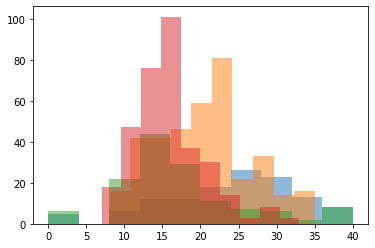

In [6]:
seleccion1=bd.campo.str.contains('MIQUETLA')
seleccion1=seleccion1.fillna(value=False)
seleccion2=bd.campo.str.contains('SOLEDAD')
seleccion2=seleccion2.fillna(value=False)
tiempos_campo1=bd[seleccion1]
tiempos_campo2=bd[seleccion2]
seleccion3=bd.campo.str.contains('HUMAPA')
seleccion3=seleccion3.fillna(value=False)
seleccion4=bd.campo.str.contains('FURBERO')
seleccion4=seleccion4.fillna(value=False)
tiempos_campo3=bd[seleccion3]
tiempos_campo4=bd[seleccion4]

display(tiempos_campo1.dias_perforacion.describe(),
        tiempos_campo2.dias_perforacion.describe(),
        tiempos_campo3.dias_perforacion.describe(),
        tiempos_campo4.dias_perforacion.describe())

dias1=tiempos_campo1[tiempos_campo1.dias_perforacion < tiempos_campo1.dias_perforacion.quantile(0.90)]
dias2=tiempos_campo2[tiempos_campo2.dias_perforacion < tiempos_campo2.dias_perforacion.quantile(0.90)]
dias3=tiempos_campo3[tiempos_campo3.dias_perforacion < tiempos_campo3.dias_perforacion.quantile(0.90)]
dias4=tiempos_campo4[tiempos_campo4.dias_perforacion < tiempos_campo4.dias_perforacion.quantile(0.90)]

plt.hist(dias1.dias_perforacion,bins=10,alpha=0.5)
plt.hist(dias2.dias_perforacion,bins=10,alpha=0.5)
plt.hist(dias3.dias_perforacion,bins=10,alpha=0.5)
plt.hist(dias4.dias_perforacion,bins=10,alpha=0.5)

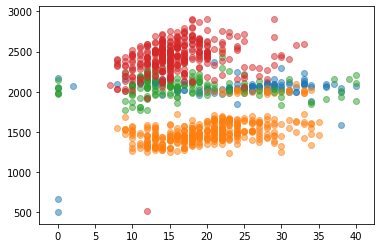

In [7]:
plt.scatter(dias1.dias_perforacion,dias1.profundidad_total,alpha=0.5,label=True)
plt.scatter(dias2.dias_perforacion,dias2.profundidad_total,alpha=0.5,label=True)
plt.scatter(dias3.dias_perforacion,dias3.profundidad_total,alpha=0.5,label=True)
plt.scatter(dias4.dias_perforacion,dias4.profundidad_total,alpha=0.5)

# Aguas Someras

(array([ 1.,  1.,  6., 10., 16., 23.,  7.,  7.,  4.,  7.]),
 array([  8. ,  27.9,  47.8,  67.7,  87.6, 107.5, 127.4, 147.3, 167.2,
        187.1, 207. ]),
 <a list of 10 Patch objects>)

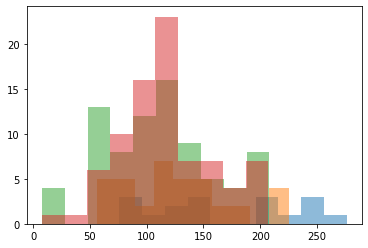

In [232]:
seleccion1=bd.campo.str.contains('SIHIL')
seleccion1=seleccion1.fillna(value=False)
seleccion2=bd.campo.str.contains('ARENQUE')
seleccion2=seleccion2.fillna(value=False)
tiempos_campo1=bd[seleccion1]
tiempos_campo2=bd[seleccion2]
seleccion3=bd.campo.str.contains('ZAAP')
seleccion3=seleccion3.fillna(value=False)
seleccion4=bd.campo.str.contains('MALOOB')
seleccion4=seleccion4.fillna(value=False)
tiempos_campo3=bd[seleccion3]
tiempos_campo4=bd[seleccion4]


dias1=tiempos_campo1[tiempos_campo1.dias_perforacion < tiempos_campo1.dias_perforacion.quantile(0.90)]
dias2=tiempos_campo2[tiempos_campo2.dias_perforacion < tiempos_campo2.dias_perforacion.quantile(0.90)]
dias3=tiempos_campo3[tiempos_campo3.dias_perforacion < tiempos_campo3.dias_perforacion.quantile(0.90)]
dias4=tiempos_campo4[tiempos_campo4.dias_perforacion < tiempos_campo4.dias_perforacion.quantile(0.90)]

plt.hist(dias1.dias_perforacion,bins=10,alpha=0.5)
plt.hist(dias2.dias_perforacion,bins=10,alpha=0.5)
plt.hist(dias3.dias_perforacion,bins=10,alpha=0.5)
plt.hist(dias4.dias_perforacion,bins=10,alpha=0.5)

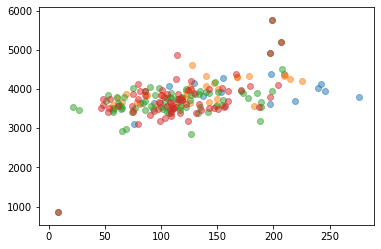

In [233]:
plt.scatter(dias1.dias_perforacion,dias1.profundidad_total,alpha=0.5,label=True)
plt.scatter(dias2.dias_perforacion,dias2.profundidad_total,alpha=0.5,label=True)
plt.scatter(dias3.dias_perforacion,dias3.profundidad_total,alpha=0.5,label=True)
plt.scatter(dias4.dias_perforacion,dias4.profundidad_total,alpha=0.5)

# Burgos

(array([ 3., 59., 93., 74., 47., 22.,  8.,  8.,  6.,  3.]),
 array([ 0.,  7., 14., 21., 28., 35., 42., 49., 56., 63., 70.]),
 <a list of 10 Patch objects>)

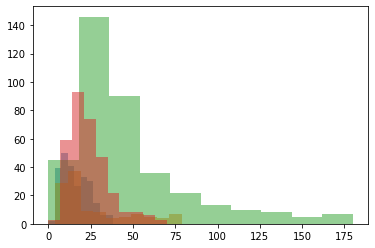

In [387]:
seleccion1=bd.campo.str.contains('NEJO')
seleccion1=seleccion1.fillna(value=False)
seleccion2=bd.campo.str.contains('BENAVIDES')
seleccion2=seleccion2.fillna(value=False)
tiempos_campo1=bd[seleccion1]
tiempos_campo2=bd[seleccion2]
seleccion3=bd.campo.str.contains('CUITLAHUAC')
seleccion3=seleccion3.fillna(value=False)
seleccion4=bd.campo.str.contains('ARCABUZ')
seleccion4=seleccion4.fillna(value=False)
tiempos_campo3=bd[seleccion3]
tiempos_campo4=bd[seleccion4]

dias1=tiempos_campo1[tiempos_campo1.dias_perforacion < tiempos_campo1.dias_perforacion.quantile(0.90)]
dias2=tiempos_campo2[tiempos_campo2.dias_perforacion < tiempos_campo2.dias_perforacion.quantile(0.90)]
dias3=tiempos_campo3[tiempos_campo3.dias_perforacion < tiempos_campo3.dias_perforacion.quantile(0.90)]
dias4=tiempos_campo4[tiempos_campo4.dias_perforacion < tiempos_campo4.dias_perforacion.quantile(0.90)]

plt.hist(dias1.dias_perforacion,bins=10,alpha=0.5)
plt.hist(dias2.dias_perforacion,bins=10,alpha=0.5)
plt.hist(dias3.dias_perforacion,bins=10,alpha=0.5)
plt.hist(dias4.dias_perforacion,bins=10,alpha=0.5)

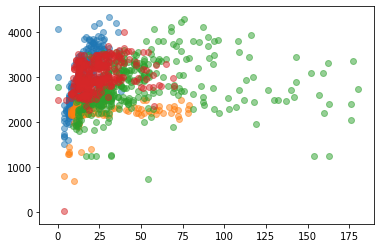

In [388]:
plt.scatter(dias1.dias_perforacion,dias1.profundidad_total,alpha=0.5,label=True)
plt.scatter(dias2.dias_perforacion,dias2.profundidad_total,alpha=0.5,label=True)
plt.scatter(dias3.dias_perforacion,dias3.profundidad_total,alpha=0.5,label=True)
plt.scatter(dias4.dias_perforacion,dias4.profundidad_total,alpha=0.5)

# Tabasco muestra 1

(array([1., 0., 0., 0., 0., 2., 2., 1., 1., 1.]),
 array([ 13. ,  58.5, 104. , 149.5, 195. , 240.5, 286. , 331.5, 377. ,
        422.5, 468. ]),
 <a list of 10 Patch objects>)

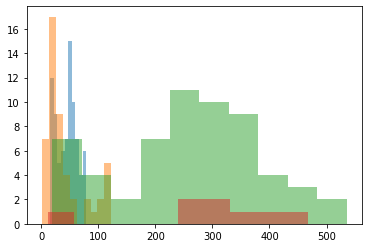

In [236]:
seleccion1=bd.campo.str.contains('RODADOR')
seleccion1=seleccion1.fillna(value=False)
seleccion2=bd.campo.str.contains('ARTESA')
seleccion2=seleccion2.fillna(value=False)
tiempos_campo1=bd[seleccion1]
tiempos_campo2=bd[seleccion2]
seleccion3=bd.campo.str.contains('BELLOTA')
seleccion3=seleccion3.fillna(value=False)
seleccion4=bd.campo.str.contains('BRICOL')
seleccion4=seleccion4.fillna(value=False)
tiempos_campo3=bd[seleccion3]
tiempos_campo4=bd[seleccion4]

dias1=tiempos_campo1[tiempos_campo1.dias_perforacion < tiempos_campo1.dias_perforacion.quantile(0.90)]
dias2=tiempos_campo2[tiempos_campo2.dias_perforacion < tiempos_campo2.dias_perforacion.quantile(0.90)]
dias3=tiempos_campo3[tiempos_campo3.dias_perforacion < tiempos_campo3.dias_perforacion.quantile(0.90)]
dias4=tiempos_campo4[tiempos_campo4.dias_perforacion < tiempos_campo4.dias_perforacion.quantile(0.90)]

plt.hist(dias1.dias_perforacion,bins=10,alpha=0.5)
plt.hist(dias2.dias_perforacion,bins=10,alpha=0.5)
plt.hist(dias3.dias_perforacion,bins=10,alpha=0.5)
plt.hist(dias4.dias_perforacion,bins=10,alpha=0.5)

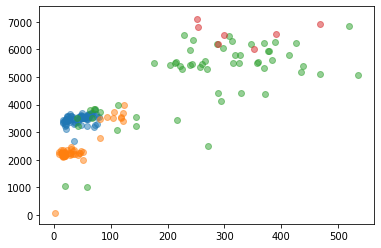

In [237]:
plt.scatter(dias1.dias_perforacion,dias1.profundidad_total,alpha=0.5,label=True)
plt.scatter(dias2.dias_perforacion,dias2.profundidad_total,alpha=0.5,label=True)
plt.scatter(dias3.dias_perforacion,dias3.profundidad_total,alpha=0.5,label=True)
plt.scatter(dias4.dias_perforacion,dias4.profundidad_total,alpha=0.5)

# Tabasco muestra 2

# Aguas profundas

(array([ 6.,  4., 15., 12.,  8., 15.,  7.,  3.,  0.,  1.]),
 array([ 18. ,  37.6,  57.2,  76.8,  96.4, 116. , 135.6, 155.2, 174.8,
        194.4, 214. ]),
 <a list of 10 Patch objects>)

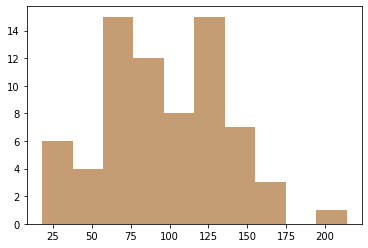

In [385]:
seleccion1=bd.ubicacion.str.contains('PROFUNDAS')
seleccion1=seleccion1.fillna(value=False)
seleccion2=bd.ubicacion.str.contains('PROFUNDAS')
seleccion2=seleccion2.fillna(value=False)

tiempos_campo1=bd[seleccion1]
tiempos_campo2=bd[seleccion2]

dias1=tiempos_campo1[tiempos_campo1.dias_perforacion < tiempos_campo1.dias_perforacion.quantile(0.90)]
dias2=tiempos_campo2[tiempos_campo2.dias_perforacion < tiempos_campo2.dias_perforacion.quantile(0.90)]

plt.hist(dias1.dias_perforacion,bins=10,alpha=0.5)
plt.hist(dias2.dias_perforacion,bins=10,alpha=0.5)

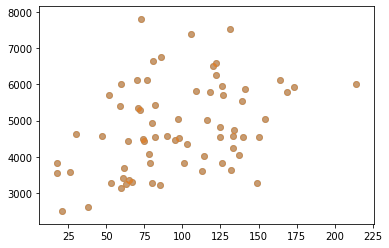

In [386]:
plt.scatter(dias1.dias_perforacion,dias1.profundidad_total,alpha=0.5,label=True)
plt.scatter(dias2.dias_perforacion,dias2.profundidad_total,alpha=0.5,label=True)

In [317]:
display(bd.columns)

Index(['gid', 'pozo', 'campo', 'entidad', 'ubicacion', 'objetivo_inicial',
       'ultimo_estado_reportado', 'tipo_de_hidrocarburo',
       'fecha_inicio_perforacion', 'fecha_fin_perforacion',
       'profundidad_total', 'profundidad_vertical', 'trayectoria',
       'disponible', 'tiempo_perforacion', 'dias_perforacion'],
      dtype='object')

# Pozos horizontales

,gid,profundidad_total,profundidad_vertical,tiempo_perforacion,dias_perforacion
count,4.080000e+02,405.00000,119.000000,408.000000,408.000000
mean,2.907795e+06,1532.83800,1942.129412,0.340686,22.656863
std,2.062579e+07,1001.90931,902.474250,0.668058,21.845895
min,1.117720e+05,509.35000,49.000000,0.000000,0.000000
25%,1.881968e+05,878.00000,1516.500000,0.000000,8.000000
50%,1.986725e+05,959.00000,2087.200000,0.000000,13.000000
75%,2.109010e+05,2341.00000,2428.800000,0.000000,29.000000
max,2.271489e+08,5765.00000,4862.000000,3.000000,97.000000


,gid,profundidad_total,profundidad_vertical,tiempo_perforacion,dias_perforacion
count,9.000000e+00,9.00000,7.000000,9.000000,9.000000
mean,1.873996e+07,3383.00000,2867.142857,1.444444,58.555556
std,5.563352e+07,1148.88435,1457.555405,0.881917,23.276120
min,1.431920e+05,1015.00000,586.000000,0.000000,30.000000
25%,1.787080e+05,3147.00000,2090.550000,1.000000,43.000000
50%,1.829570e+05,3539.00000,2573.300000,1.000000,55.000000
75%,2.289590e+05,4057.00000,4035.300000,2.000000,69.000000
max,1.670960e+08,4570.00000,4659.000000,3.000000,94.000000


(array([2., 0., 2., 1., 0., 1., 1., 0., 0., 2.]),
 array([30. , 36.4, 42.8, 49.2, 55.6, 62. , 68.4, 74.8, 81.2, 87.6, 94. ]),
 <a list of 10 Patch objects>)

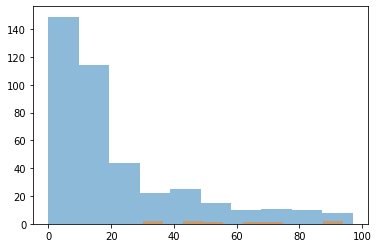

In [11]:
seleccion1=bd.trayectoria.str.contains('HORIZONTAL')
seleccion1=seleccion1.fillna(value=False)
seleccion2=bd.trayectoria.str.contains('MULTILATERAL')
seleccion2=seleccion2.fillna(value=False)
seleccion3=bd.trayectoria.str.contains('DIRECCIONAL')
seleccion3=seleccion3.fillna(value=False)
seleccion4=bd.trayectoria.str.contains('VERTICAL')
seleccion4=seleccion4.fillna(value=False)


tiempos_campo1=bd[seleccion1]
tiempos_campo2=bd[seleccion2]
tiempos_campo3=bd[seleccion3]
tiempos_campo4=bd[seleccion4]

dias1=tiempos_campo1[tiempos_campo1.dias_perforacion < tiempos_campo1.dias_perforacion.quantile(0.90)]
dias2=tiempos_campo2[tiempos_campo2.dias_perforacion < tiempos_campo2.dias_perforacion.quantile(0.90)]
dias3=tiempos_campo3[tiempos_campo3.dias_perforacion < tiempos_campo3.dias_perforacion.quantile(0.90)]
dias4=tiempos_campo4[tiempos_campo4.dias_perforacion < tiempos_campo4.dias_perforacion.quantile(0.90)]

display(dias1.describe(),
        dias2.describe(),)
        #dias3.describe(),
        #dias4.describe())

plt.hist(dias1.dias_perforacion,bins=10,alpha=0.5)
plt.hist(dias2.dias_perforacion,bins=10,alpha=0.5)
#plt.hist(dias3.dias_perforacion[dias3.dias_perforacion > 0],bins=10,alpha=0.5)
#plt.hist(dias4.dias_perforacion[dias4.dias_perforacion > 0],bins=10,alpha=0.5)

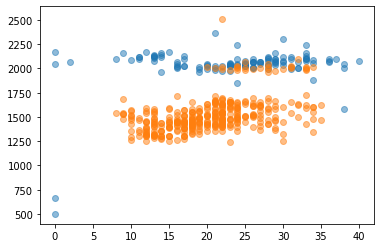

In [8]:
plt.scatter(dias1.dias_perforacion,dias1.profundidad_total,alpha=0.5,label=True)
plt.scatter(dias2.dias_perforacion,dias2.profundidad_total,alpha=0.5,label=True)
#plt.scatter(dias3.dias_perforacion[dias3.dias_perforacion > 0],dias3.profundidad_total[dias3.dias_perforacion > 0],alpha=0.5,label=True)
#plt.scatter(dias4.dias_perforacion[dias4.dias_perforacion > 0],dias4.profundidad_total[dias4.dias_perforacion > 0],alpha=0.5,label=True)

In [383]:
display(pd.unique(bd.trayectoria))

array(['DIRECCIONAL', 'VERTICAL', 'HORIZONTAL', 'MULTILATERAL', nan,
       'DIRECCIONAL S', 'DIRECCIONAL J', 'DESVIADO', 'EN PERFORACION'],
      dtype=object)